**Phase Graph Examples**  

This notebook uses code from the python file `phase_graph.py`, which should be in the same directory:

-  `pg_plot()` - a function to plot phase graphs
-  `basic_epg()` - a python class for basic EPG calculations

The latter is only used, if the `pyepg` class is **not** available. This is a python wrapper for a fast cpp implementation of EPGs, see [here](https://github.com/mrphysics-bonn/EPGpp). 

Both classes have the same functionality, but `pyepg` is approximately 1000 times faster than `basic_epg`. With `basic_epg` some example may take several minutes.

The examples are grouped in two parts:
- Part I: phase graph plotting
- Part II: EPG calculations


In [41]:
import numpy as np
import matplotlib.pyplot   as plt

# import phase graph plotting function
from phase_graph import pg_plot

# import EPG class
# if available import fast pyepg, otherwise use basic_epg
import importlib.util
pyepg_spec  = importlib.util.find_spec("pyepg")
pyepg_found = pyepg_spec is not None

if pyepg_found:
    import pyepg
else:
    from phase_graph import basic_epg
    print('module pyepg not found ... continue with slower basic_epg module')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Part I**: plotting phase graphs with the `pg_plot()` function 

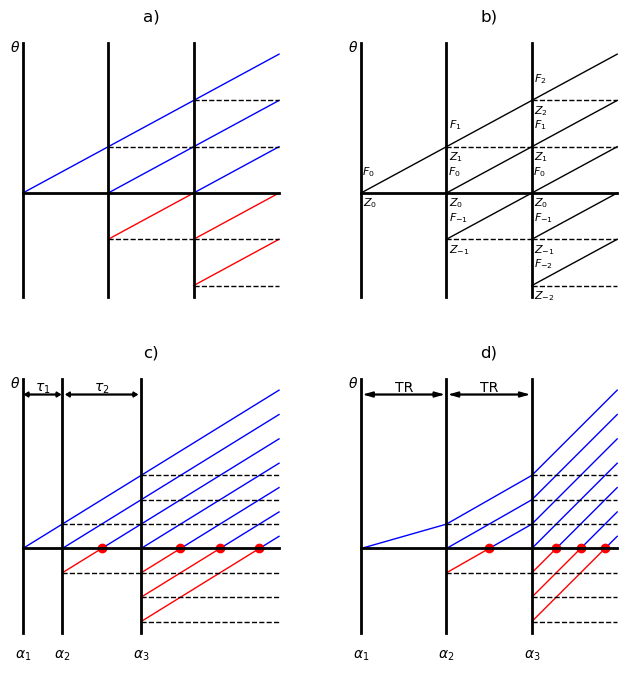

In [42]:
# phase graph plotting examples with 3 RF pulses
fig, ax = plt.subplots(2, 2)

# a) Phase graph with constant pulse spacing and constant dephasing (=> this is an EPG!).
pg_plot(axis=ax[0, 0],T=[1,1,1])
ax[0, 0].set_title('a)')

# b) Same as before, but with EPG state labels and without colored transverse branches. 
pg_plot(axis=ax[0, 1],T=[1,1,1],BLACK=True,STATE_LABELS=True)
ax[0, 1].set_title('b)')

# c) Phase graph with varying pulse spacing (not EPG in the strict sense), and with labels for flip-angles and pulse spacings.
pg_plot(axis=ax[1, 0],T=[1,2,3.5],TAU_LABELS=True,FA_LABELS=True)
ax[1, 0].set_title('c)')

# d) Phase graph with constant pulse spacing but varying dephasing (again, not EPG in the strict sense).
#    The pulse spacing labels (output #4) are overwritten with text 'TR'.
TL=pg_plot(axis=ax[1, 1],T=[1,1,1],G=[1,2,3.5],TAU_LABELS=True,FA_LABELS=True)[3]
for i in range(2): TL[i].set_text('TR')
ax[1, 1].set_title('d)')
fig.set_size_inches(8,8)
plt.show()


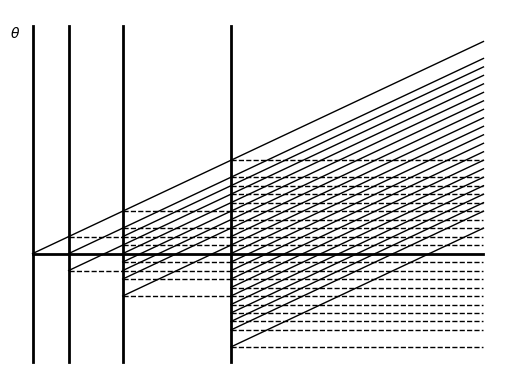

# echoes: 15  , max # echoes: 18


In [46]:
# phase graph plotting example with 4 RF pulses and echo count output (ECHO_COUNT=True)
pg_plot([1, 1.5, 3, 7],ECHOES=False, BLACK=True, ECHO_COUNT=True)
plt.show()

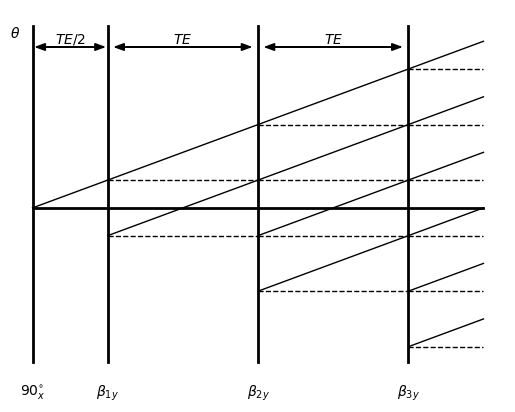

In [44]:
# phase graph of a CPMG sequence
fig, ax = plt.subplots()

# Plot phase graph and return FA-labels and time-labels (2nd and 4th output argument => slice [1:4:2])
(FL,TL)=pg_plot(axis=ax,T=[1,2,2,1],CPMG=True,FA_LABELS=True,TAU_LABELS=True,ECHOES=False,BLACK=True)[1:4:2]
# CPMG=True => excitation states from refocusing pulses are not plotted

# Overwrite FA-labels (alpha1,alpha2,...) with suitable text for CPMG
FL[0].set_text(r'90$^{\circ}_x$')
for i in range(1,4): FL[i].set_text(r'$\beta_{'+str(i)+'y}$')

# Overwrite time-labels (tau1,tau2,...) with suitable text for CPMG
TL[0].set_text(r'$TE/2$')
for i in range(1,3): TL[i].set_text(r'$TE$')

plt.show()


**Part II**: extended phase graph (EPG) calculations with the `basic_epg` class or with the `pyepg` class

The `pyepg` class is a python wrapper for a fast cpp implementation of EPGs, see [here](https://github.com/mrphysics-bonn/EPGpp).

The `basic_epg` class has exactly the same functionality but is approximately 1000 times slower. 

In [47]:
# creating an EPG instance requires tissue parameters (M0,T1,T2) and a fixed TR

M0   = 1.0
T1   = 800.0
T2   = 50.0
TR   = 10.0

# use basic_epg class if pyepg is not available
EPG = basic_epg(M0, T1, T2, TR) if not pyepg_found else pyepg.PyEPG(M0, T1, T2, TR) 

In [48]:
# 1st Example: print all EPG states for a sequence with four RF pulses 

alpha  = np.array([45, 45, 45, 45]) # RF flip angles
phi    = np.array([ 0,  0,  0,  0]) # RF phases

for n in range(len(alpha)):
    print('\n pulse n=%d : FA=%5.2f, PHI=%5.2f' % (n+1,alpha[n],phi[n]) )
    EPG.Step(fa=alpha[n],ph=phi[n]) 
    # print all states after pulse 
    for k in range(EPG.GetStep()):
        if k>0: # print negative states as well
            print(' Fa(k=%2d) [Real,Imag] = [%5.2f,%5.2f]' % (-k,EPG.GetReFa(num=-k),EPG.GetImFa(num=-k)), end='')
            print(' | Za(k=%2d) [Real,Imag] = [%5.2f,%5.2f]' % (-k,EPG.GetReZa(num=k),-EPG.GetImZa(num=k)) )
        print(' Fa(k=%2d) [Real,Imag] = [%5.2f,%5.2f]' % (k,EPG.GetReFa(num=k),EPG.GetImFa(num=k)) , end='')
        print(' | Za(k=%2d) [Real,Imag] = [%5.2f,%5.2f]' % (k,EPG.GetReZa(num=k),EPG.GetImZa(num=k)) )



 pulse n=1 : FA=45.00, PHI= 0.00
 Fa(k= 0) [Real,Imag] = [ 0.00,-0.71] | Za(k= 0) [Real,Imag] = [ 0.71, 0.00]

 pulse n=2 : FA=45.00, PHI= 0.00
 Fa(k= 0) [Real,Imag] = [ 0.00,-0.50] | Za(k= 0) [Real,Imag] = [ 0.50, 0.00]
 Fa(k=-1) [Real,Imag] = [ 0.00, 0.08] | Za(k=-1) [Real,Imag] = [-0.20,-0.00]
 Fa(k= 1) [Real,Imag] = [ 0.00,-0.49] | Za(k= 1) [Real,Imag] = [-0.20, 0.00]

 pulse n=3 : FA=45.00, PHI= 0.00
 Fa(k= 0) [Real,Imag] = [ 0.00,-0.31] | Za(k= 0) [Real,Imag] = [ 0.41, 0.00]
 Fa(k=-1) [Real,Imag] = [ 0.00, 0.20] | Za(k=-1) [Real,Imag] = [-0.29,-0.00]
 Fa(k= 1) [Real,Imag] = [ 0.00,-0.21] | Za(k= 1) [Real,Imag] = [-0.29, 0.00]
 Fa(k=-2) [Real,Imag] = [ 0.00, 0.06] | Za(k=-2) [Real,Imag] = [-0.14,-0.00]
 Fa(k= 2) [Real,Imag] = [ 0.00,-0.35] | Za(k= 2) [Real,Imag] = [-0.14, 0.00]

 pulse n=4 : FA=45.00, PHI= 0.00
 Fa(k= 0) [Real,Imag] = [ 0.00,-0.18] | Za(k= 0) [Real,Imag] = [ 0.41, 0.00]
 Fa(k=-1) [Real,Imag] = [ 0.00, 0.28] | Za(k=-1) [Real,Imag] = [-0.27,-0.00]
 Fa(k= 1) [Real,I

In [49]:
# 2nd Example: multiple steps with constant flip angle
N       = 10 
alpha   = 50 

# reset EPG
EPG.Equilibrium()

EPG.Steps(fa=alpha,ph=0,steps=N)
print('\nk=0 state after',N,'pulses:')
print(  ' Fa(k=0) [Real,Imag] = [%5.2f,%5.2f]' % (EPG.GetReFa(num=0),EPG.GetImFa(num=0)) , end='')
print(' | Za(k=0) [Real,Imag] = [%5.2f,%5.2f]' % (EPG.GetReZa(num=0),EPG.GetImZa(num=0)) )

EPG.Steps(fa=alpha,ph=0,steps=N)
print('\nk=0 state after another',N,'pulses:')
print(  ' Fa(k=0) [Real,Imag] = [%5.2f,%5.2f]' % (EPG.GetReFa(num=0),EPG.GetImFa(num=0)) , end='')
print(' | Za(k=0) [Real,Imag] = [%5.2f,%5.2f]' % (EPG.GetReZa(num=0),EPG.GetImZa(num=0)) )

# Was a steady state observed? There is a function to find the number of steps to reach steady state:
EPG.Equilibrium()
Nss = EPG.StepsToSS(fa=alpha,Qph=0,tol=1e-6)
print('\n steady state reached after',Nss,'pulses:')
print(  ' Fa(k=0) [Real,Imag] = [%8.5f,%8.5f]' % (EPG.GetReFa(num=0),EPG.GetImFa(num=0)) , end='')
print(' | Za(k=0) [Real,Imag] = [%8.5f,%8.5f]' % (EPG.GetReZa(num=0),EPG.GetImZa(num=0)) )

print('\n Test: apply one more step')
EPG.Step(fa=alpha,ph=0)
print(  ' Fa(k=0) [Real,Imag] = [%8.5f,%8.5f]' % (EPG.GetReFa(num=0),EPG.GetImFa(num=0)) , end='')
print(' | Za(k=0) [Real,Imag] = [%8.5f,%8.5f]' % (EPG.GetReZa(num=0),EPG.GetImZa(num=0)) )



k=0 state after 10 pulses:
 Fa(k=0) [Real,Imag] = [ 0.00,-0.20] | Za(k=0) [Real,Imag] = [ 0.31, 0.00]

k=0 state after another 10 pulses:
 Fa(k=0) [Real,Imag] = [ 0.00,-0.13] | Za(k=0) [Real,Imag] = [ 0.25, 0.00]

 steady state reached after 178 pulses:
 Fa(k=0) [Real,Imag] = [ 0.00000,-0.06789] | Za(k=0) [Real,Imag] = [ 0.11480, 0.00000]

 Test: apply one more step
 Fa(k=0) [Real,Imag] = [ 0.00000,-0.06789] | Za(k=0) [Real,Imag] = [ 0.11480, 0.00000]


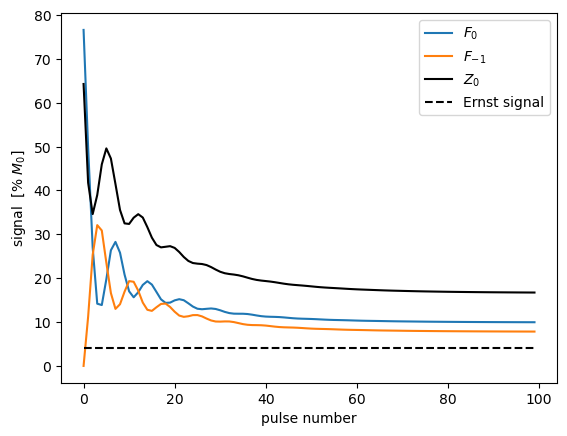

In [50]:
# 3rd Example: approach to steady state

# reset EPG with different parameters
M0   = 1.0
T1   = 1000.0
T2   = 100
TR   = 20
EPG.SetParameters(M0,T1,T2,TR) # => EPG is in equilibrium state 

N       = 100  # number of pulses
alpha   = 50   # flip-angle

F_fid    = np.zeros((N,)) # FID signal  = F_{0} state
F_echo   = np.zeros((N,)) # ECHO signal = F_{-1} state
Z_ground = np.zeros((N,)) # longitudinal ground state = Z_{0}

E1     = np.exp(-EPG.GetTR()/EPG.GetT1())
Ernst  = EPG.GetM0()*np.sin(alpha*np.pi/180)*(1-E1)/(1-np.cos(alpha*np.pi/180)*E1)

for n in range(N):
    EPG.Step(fa=alpha,ph=0)
    F_fid[n]    = EPG.GetMagFa(num= 0)
    F_echo[n]   = EPG.GetMagFa(num=-1)
    Z_ground[n] = EPG.GetMagZa(num= 0)

fig, ax = plt.subplots()
ax.plot(100/M0*F_fid,label='$F_0$')
ax.plot(100/M0*F_echo,label='$F_{-1}$')
ax.plot(100/M0*Z_ground,'k',label='$Z_0$')
ax.plot(100/M0*Ernst*np.ones((N,)),'k--',label='Ernst signal')
ax.legend()
ax.set_xlabel('pulse number')
ax.set_ylabel('signal  [% $M_0$]')

plt.show()

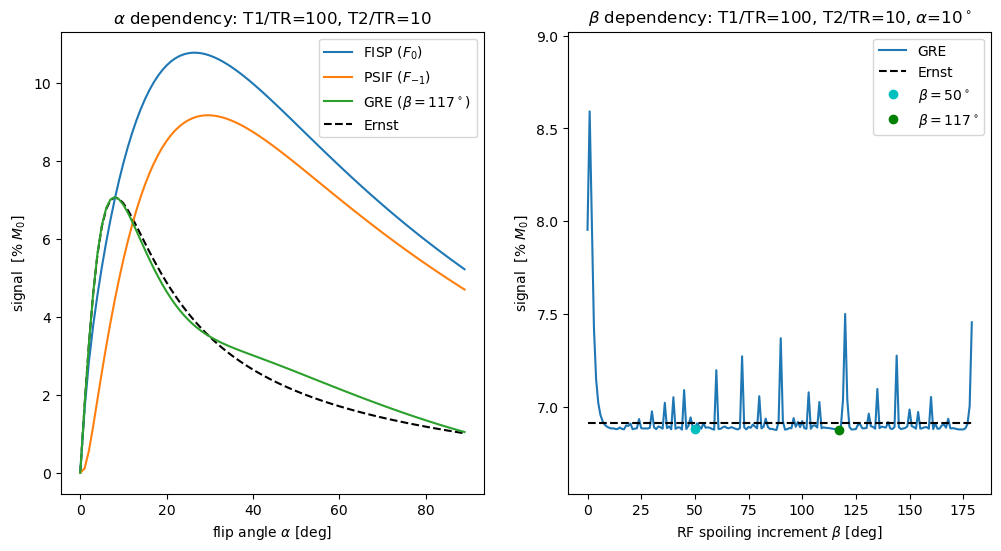

In [51]:
# 4th Example: steady state signal levels
# (might take several minutes with the basic_epp class!)

# function to calculate steady state signal with EPG
def epg_ss(M0, T1, T2, alpha, beta, TR, num=0, tol = 1e-10 ):
    EPG.SetParameters(M0, T1, T2, TR) 
    EPG.StepsToSS(fa=alpha, Qph=beta, tol=tol)   
    return EPG.GetMagFa(num)

M0  = 1
T1  = 1000
T2  = 100
TR  = 10
E1  = np.exp(-TR/T1)

#Experiment 1: flip angle dependency
N        = 90 # number of flip angles 
v_alpha  = np.linspace(0,90,N,endpoint=False) 
s_vaFISP = np.zeros((N,)) # signal vector for FISP sequence (F_{0} state without RF Spoiling)
s_vaPSIF = np.zeros((N,)) # signal vector for PSIF sequence (F_{-1} state )
s_vaGRE  = np.zeros((N,)) # signal vector for GRE sequence (F_{0} state with RF Spoiling)
s_Ernst  = np.zeros((N,)) # signal vector for steady state Ernst Equation
for i in range(N):
    s_vaFISP[i]= epg_ss(M0, T1, T2, v_alpha[i],   0, TR )          # F_0 without RF spoiling 
    s_vaPSIF[i]= epg_ss(M0, T1, T2, v_alpha[i],   0, TR, num=-1 )  # F_{-1} without RF spoiling 
    s_vaGRE[i] = epg_ss(M0, T1, T2, v_alpha[i], 117, TR )          # F_0 with RF spoiling increment beta=117
    s_Ernst[i] = M0*np.sin(v_alpha[i]*np.pi/180)*(1-E1)/(1-np.cos(v_alpha[i]*np.pi/180)*E1) # Ernst amplitude

#Experiment 2: spoiling increment dependency 
N       = 180 # number of qudaratic phase increments           
beta    = np.linspace(0,180,N,endpoint=False)   
alpha   = 10             # constant flip angle - you may want to try the Ernst angle: np.acos(E1)*180/np.pi
s_vbGRE = np.zeros((N,)) # signal vector for GRE sequence (F_{0} state with RF Spoiling)
for i in range(N):
    s_vbGRE[i] = epg_ss(M0, T1, T2, alpha, beta[i], TR ) # fixed flip-angle alpha = 20
Ernst  = M0*np.sin(alpha*np.pi/180)*(1-E1)/(1-np.cos(alpha*np.pi/180)*E1)

#plot results
fig, axs = plt.subplots(1,2)
# flip angle dependency
axs[0].plot(v_alpha,100/M0*s_vaFISP,label='FISP ($F_{0}$)')
axs[0].plot(v_alpha,100/M0*s_vaPSIF,label='PSIF ($F_{-1}$)')
axs[0].plot(v_alpha,100/M0*s_vaGRE, label=r'GRE ($\beta=117^\circ$)')
axs[0].plot(v_alpha,100/M0*s_Ernst,'--k',label='Ernst',zorder=0)
axs[0].set_ylabel('signal  [% $M_0$]')
axs[0].set_xlabel(r'flip angle $\alpha$ [deg]')
axs[0].set_title(r'$\alpha$ dependency: T1/TR=%d, T2/TR=%d' % (T1/TR,T2/TR))
axs[0].legend(loc='upper right')
# RF spoiling dependency
axs[1].plot(beta,100/M0*s_vbGRE,label='GRE')
axs[1].plot(beta,100/M0*Ernst*np.ones(len(beta)),'k--',label='Ernst')
axs[1].plot(beta[50],100/M0*s_vbGRE[50],'oc',label=r'$\beta=$%d$^\circ$' % beta[50])
axs[1].plot(beta[117],100/M0*s_vbGRE[117],'og',label=r'$\beta=$%d$^\circ$' % beta[117])
axs[1].set_ylabel('signal  [% $M_0$]')
axs[1].set_xlabel(r'RF spoiling increment $\beta$ [deg]')
axs[1].set_ylim((.95*np.min(100/M0*s_vbGRE),1.05*np.max(100/M0*s_vbGRE)))

axs[1].set_title(r'$\beta$ dependency: T1/TR=%d, T2/TR=%d, $\alpha$=%d$^\circ$' % (T1/TR,T2/TR,alpha))
axs[1].legend(loc='upper right')

fig.set_size_inches(12,6)
plt.show()


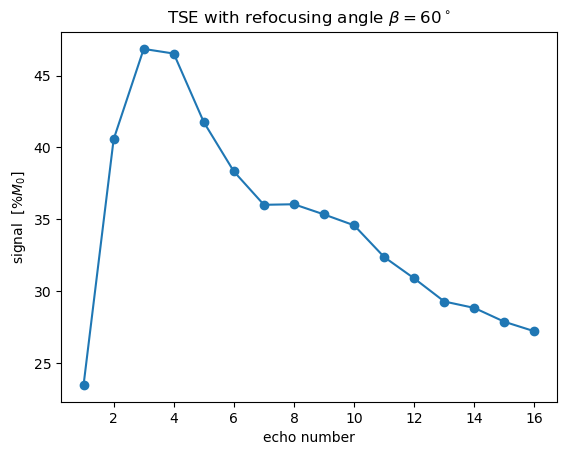

In [52]:
# 5th Example: CPMG (or TSE) signal calculation with EPG 

M0        = 1
T1        = 1000
T2        = 80
TE        = 5       # echo time
beta      = 60      # refocusing flip angle
N         = 16      # echo train length

def tse(EPG, M0, T1, T2, beta, TE, N):

    EPG.SetParameters(M0, T1, T2, TE/2)
    signal = np.zeros((N,))

    EPG.Step(fa=90,ph=0)         # excitation around x-axis and TE/2 evolution
    for i in range(N):           # TSE train
        EPG.Step(fa=beta,ph=90)  # refocusing around y-axis and TE/2 evolution
        EPG.Step(fa=0   ,ph=0)   # another TE/2 evolution
        signal[i]=EPG.GetMagFa() # spin echo directly after the last "pulse" (zero flip-angle)

    return signal

signal = tse(EPG, M0, T1, T2, beta, TE, N)

plt.plot(np.linspace(1,N,N),100/M0*signal,'-o')
plt.ylabel('signal  [%$M_0$]')
plt.xlabel('echo number')
plt.title(r'TSE with refocusing angle $\beta=$%d$^\circ$' % beta )
plt.show()